 # <span style="color:green; font-weight:bold;">   Training a Deep Learning Model for Hate Speech Detection</span>


 # <span style="color:GREEN; font-weight:bold;">Import the Necessary Library</span>


In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

 # <span style="color:GREEN; font-weight:bold;">Load The Dataset</span>


In [22]:
data = pd.read_csv("/kaggle/input/hate-speech/reduced_data.csv")
df

,Text,Label
0,total energy so renewable energy in the countr...,0.0
1,haha you got owned bitch,1.0
2,greetings hello there i what a slut wondering ...,0.0
3,thanks for your reply now that you mention it ...,0.0
4,islams you mother f ers,1.0
...,...,...
180697,finally time to do your job shonen shirley giv...,0.0
180698,also make the following defamatory attack on m...,0.0
180699,remove moshe bargain he is hebrew not kurdish,0.0
180700,wrong this article is called circumcision beca...,0.0


 # <span style="color:GREEN; font-weight:bold;">Vectorize the Feature</span>


In [23]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Apply the vectorizer to the 'text' column
X = vectorizer.fit_transform(df['Text'])

# Get the labels (assuming the 'label' column is your target)
y = df['Label']

 # <span style="color:GREEN; font-weight:bold;">Train Test Split</span>


In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # <span style="color:GREEN; font-weight:bold;">Model Building</span>


In [25]:
# Initializing the ANN
classifier = Sequential()

# Input layer with dropout
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.3))                                     # Dropout to reduce overfitting

# Hidden layer 1 with dropout
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.3))

# Hidden layer 2 with dropout
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.2))

# Hidden layer 3
classifier.add(Dense(units=32, activation='relu'))

# Output layer
classifier.add(Dense(units=1, activation='sigmoid'))

 # <span style="color:GREEN; font-weight:bold;">Model Summary</span>


In [26]:
classifier.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

 # <span style="color:GREEN; font-weight:bold;">Implementing Early Stopping in Model Training</span>


### Early stopping is a technique used to prevent overfitting during training. It monitors the performance of the model on the validation set and stops training when the performance stops improving.


In [27]:
early_stopping = EarlyStopping(
    monitor='val_loss',               # Metric to monitor
    patience=5,                      # Number of epochs to wait before stopping
    restore_best_weights=True       # Restore model weights from the epoch with the best metric value
)

In [28]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [29]:
history = classifier.fit(
    X_train,                               # Training data
    y_train,                              # Training labels
    epochs=20,                           # Maximum number of epochs to train
    batch_size=10,                      # Number of samples per gradient update
    validation_split=0.2,              # Use 20% of training data for validation
    callbacks=[early_stopping],       # Use EarlyStopping callback
    verbose=1                        # Print detailed logs during training
)

Epoch 1/20
11565/11565 ━━━━━━━━━━━━━━━━━━━━ 72s 6ms/step - accuracy: 0.7772 - loss: 0.4605 - val_accuracy: 0.8178 - val_loss: 0.3950
Epoch 2/20
11565/11565 ━━━━━━━━━━━━━━━━━━━━ 70s 6ms/step - accuracy: 0.8399 - loss: 0.3616 - val_accuracy: 0.8263 - val_loss: 0.3841
Epoch 3/20
11565/11565 ━━━━━━━━━━━━━━━━━━━━ 71s 6ms/step - accuracy: 0.8648 - loss: 0.3171 - val_accuracy: 0.8279 - val_loss: 0.3842
Epoch 4/20
11565/11565 ━━━━━━━━━━━━━━━━━━━━ 68s 6ms/step - accuracy: 0.8860 - loss: 0.2788 - val_accuracy: 0.8264 - val_loss: 0.3947
Epoch 5/20
11565/11565 ━━━━━━━━━━━━━━━━━━━━ 69s 6ms/step - accuracy: 0.9008 - loss: 0.2458 - val_accuracy: 0.8259 - val_loss: 0.4094
Epoch 6/20
11565/11565 ━━━━━━━━━━━━━━━━━━━━ 68s 6ms/step - accuracy: 0.9116 - loss: 0.2191 - val_accuracy: 0.8231 - val_loss: 0.4420
Epoch 7/20
11565/11565 ━━━━━━━━━━━━━━━━━━━━ 69s 6ms/step - accuracy: 0.9216 - loss: 0.1980 - val_accuracy: 0.8216 - val_loss: 0.4457


 # <span style="color:GREEN; font-weight:bold;">Classification Report</span>


In [30]:
from sklearn.metrics import classification_report
# Make Predictions
y_pred = classifier.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Generate Classification Report
report = classification_report(y_test, y_pred_classes, target_names=['Non-Hate', 'Hate'])
print(report)

1130/1130 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

    Non-Hate       0.85      0.85      0.85     20206
        Hate       0.81      0.80      0.81     15935

    accuracy                           0.83     36141
   macro avg       0.83      0.83      0.83     36141
weighted avg       0.83      0.83      0.83     36141



 # <span style="color:GREEN; font-weight:bold;">Confusion Matrix</span>


1130/1130 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


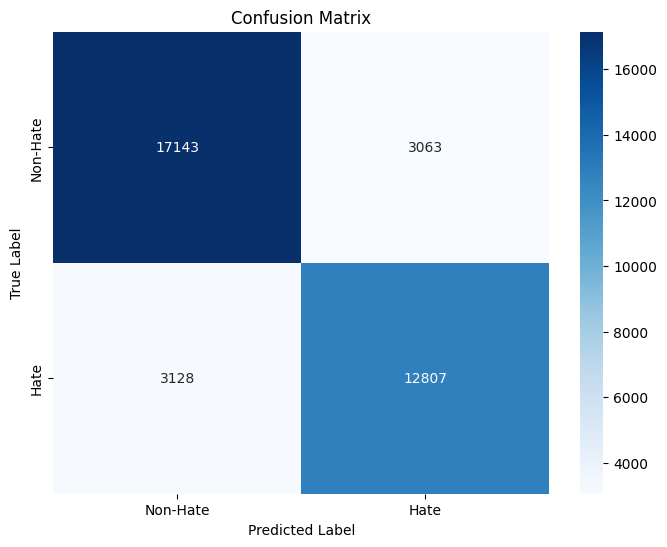

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = classifier.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Threshold at 0.5

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()




 # <span style="color:GREEN; font-weight:bold;">Model Saving</span>


In [33]:
classifier.save('hate_speech_model.h5')

 # <span style="color:GREEN; font-weight:bold;">Model Prediction</span>


In [35]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/kaggle/working/hate_speech_model.h5')

# Use the model for real-time prediction
new_data = vectorizer.transform(["Thanks for your reply"]).toarray() 
prediction = model.predict(new_data)

# Interpret the result
threshold = 0.5  # Set a threshold for classification
label = "Hate Speech" if prediction >= threshold else "Not Hate Speech"

print("Prediction:", label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: Not Hate Speech
